In [149]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [122]:
data=pd.read_csv("/Users/luisnakayama/Desktop/ibge/data_internet.csv")

In [123]:
data.head()

,id,state,house_type,internet,gender,age,race,educational_level,ultima_consulta_medico,dificuldade_atividades_diarias,diabetes_restriction,populacao,renda_per_capita
0,1,rondonia,1,1,2,55,1.0,Antigo primário (elementar),Até 1 ano,NaN,NaN,529479,350.0
1,2,rondonia,1,1,1,69,4.0,NaN,Até 1 ano,0.0,NaN,529479,350.0
2,3,rondonia,1,1,1,31,2.0,Regular do ensino médio ou do 2º grau,Até 1 ano,NaN,NaN,529479,350.0
3,4,rondonia,1,1,1,9,2.0,NaN,Até 1 ano,NaN,NaN,529479,350.0
4,5,rondonia,1,1,2,6,4.0,NaN,Até 1 ano,NaN,NaN,529479,350.0


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279382 entries, 0 to 279381
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              279382 non-null  int64  
 1   state                           279382 non-null  object 
 2   house_type                      279382 non-null  int64  
 3   internet                        279382 non-null  int64  
 4   gender                          279382 non-null  int64  
 5   age                             279382 non-null  int64  
 6   race                            279358 non-null  float64
 7   educational_level               178013 non-null  object 
 8   ultima_consulta_medico          279382 non-null  object 
 9   dificuldade_atividades_diarias  9250 non-null    float64
 10  diabetes_restriction            7101 non-null    object 
 11  populacao                       279382 non-null  int64  
 12  renda_per_capita

In [125]:
data.describe()

,id,house_type,internet,gender,age,race,dificuldade_atividades_diarias,populacao,renda_per_capita
count,279382.000000,279382.000000,279382.000000,279382.000000,279382.000000,279358.000000,9250.000000,2.793820e+05,279210.000000
mean,139691.500000,1.240159,0.800220,1.518788,35.267651,2.735318,0.394054,4.015985e+06,1314.001046
std,80650.780791,0.427180,0.399836,0.499648,21.675970,1.417531,0.488673,4.692417e+06,2307.681908
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.092790e+05,0.000000
25%,69846.250000,1.000000,1.000000,1.000000,17.000000,1.000000,0.000000,1.056388e+06,399.000000
50%,139691.500000,1.000000,1.000000,2.000000,34.000000,4.000000,0.000000,2.185300e+06,760.000000
75%,209536.750000,1.000000,1.000000,2.000000,52.000000,4.000000,1.000000,5.502683e+06,1397.000000
max,279382.000000,2.000000,1.000000,2.000000,112.000000,5.000000,1.000000,2.419143e+07,203196.000000


In [130]:
data=data.drop('id', axis=1)

In [131]:
numerical_features=[features for features in data.columns if data[features].dtype!='O']

print('Number of numerical features' , len(numerical_features))

# discrete features

discrete_features = [features for features in numerical_features if len(data[features].unique())<=10]

print('discrete features', len(discrete_features))
print(discrete_features)

Number of numerical features 8
discrete features 5
['house_type', 'internet', 'gender', 'race', 'dificuldade_atividades_diarias']


continous features 3


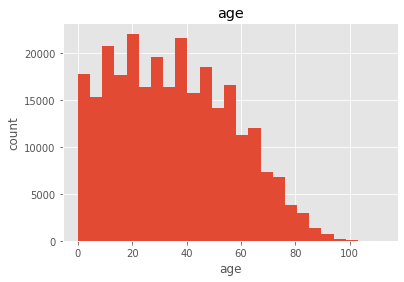

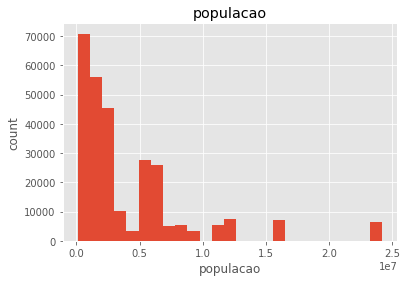

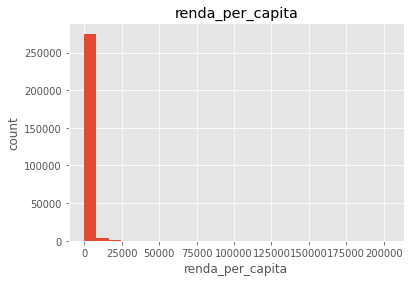

In [132]:
# continous features

continous_features = [features for features in numerical_features if features not in discrete_features] 

print("continous features" , len(continous_features))

for features in continous_features:
    data = data.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

In [133]:
categorical_features = [features for features in data.columns if data[features].dtype=='O']
print(len(categorical_features))

for features in categorical_features:
    print(f"The feature is {features} and number of categories are {len(data[features].unique())}")

4
The feature is state and number of categories are 27
The feature is educational_level and number of categories are 16
The feature is ultima_consulta_medico and number of categories are 5
The feature is diabetes_restriction and number of categories are 6


In [134]:
#show missing values
data.isna().sum().sort_values()

state                                  0
house_type                             0
internet                               0
gender                                 0
age                                    0
ultima_consulta_medico                 0
populacao                              0
race                                  24
renda_per_capita                     172
educational_level                 101369
dificuldade_atividades_diarias    270132
diabetes_restriction              272281
dtype: int64

In [135]:

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,house_type,internet,gender,age,race,dificuldade_atividades_diarias,populacao,renda_per_capita
house_type,1.000000,-0.376425,-0.042136,-0.033350,0.100051,-0.028910,0.084550,-0.153723
internet,-0.376425,1.000000,0.027505,-0.124535,-0.102773,0.053047,-0.002253,0.136378
gender,-0.042136,0.027505,1.000000,0.048007,-0.008446,0.019911,-0.003921,-0.003479
age,-0.033350,-0.124535,0.048007,1.000000,-0.087807,0.295724,0.052188,0.162242
race,0.100051,-0.102773,-0.008446,-0.087807,1.000000,-0.023472,-0.141228,-0.181758
dificuldade_atividades_diarias,-0.028910,0.053047,0.019911,0.295724,-0.023472,1.000000,-0.023228,-0.011220
populacao,0.084550,-0.002253,-0.003921,0.052188,-0.141228,-0.023228,1.000000,0.032210
renda_per_capita,-0.153723,0.136378,-0.003479,0.162242,-0.181758,-0.011220,0.032210,1.000000


In [136]:
corr = data.corr()[['internet']].sort_values(by='internet',ascending=False)

corr.head(10)

,internet
internet,1.000000
renda_per_capita,0.136378
dificuldade_atividades_diarias,0.053047
gender,0.027505
populacao,-0.002253
race,-0.102773
age,-0.124535
house_type,-0.376425


In [137]:
data_clean = data.drop(["educational_level", "dificuldade_atividades_diarias", "diabetes_restriction", 'diabetes_restriction', 'state', 'ultima_consulta_medico'], axis=1)
data_clean=data_clean.dropna()
data_clean.isna().sum().sort_values()



house_type          0
internet            0
gender              0
age                 0
race                0
populacao           0
renda_per_capita    0
dtype: int64

In [138]:
logreg=LogisticRegression()

In [140]:
X = data_clean.drop(['internet'], axis=1).values
y = data_clean['internet'].astype(int).values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)


In [141]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [142]:
y_pred = logreg.predict (x_test)


In [143]:
y_pred_prob = logreg.predict_proba (x_test) [ :, 1]
print (y_pred_prob[0])


0.656563885777937


In [144]:
from sklearn.metrics import roc_auc_score
 
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))
 
# Calculate the confusion matrix
print(confusion_matrix(y_test,y_pred))
 
# Calculate the classification report
print(classification_report(y_test,y_pred))

0.6684199878038368
[[    0 16640]
 [    0 67116]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16640
           1       0.80      1.00      0.89     67116

    accuracy                           0.80     83756
   macro avg       0.40      0.50      0.44     83756
weighted avg       0.64      0.80      0.71     83756



In [145]:
logreg.score(x_test, y_test)

0.8013276660776542

In [146]:
print(logreg.coef_)

[[4.28293508e-07 8.95807938e-07 1.53286364e-05 1.44584991e-06
  3.80276443e-08 1.23356819e-03]]
